In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob

In [4]:
path_list = glob.glob('./data/image/*.png')
img_list = [cv2.imread(path, cv2.IMREAD_ANYDEPTH) for path in path_list]
x = np.linspace(0, 511, 512)
target = 20000

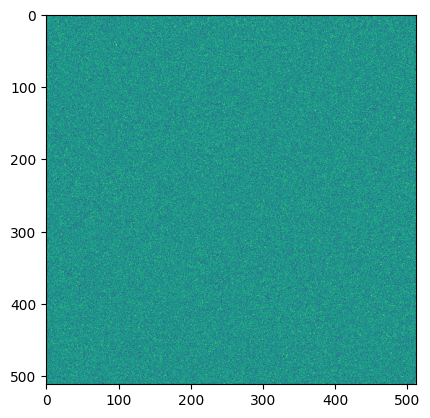

In [3]:
fig, ax = plt.subplots()
ax.imshow(img_list[0])

In [28]:
def rotate_all_images(_img_list):
    _images = _img_list
    _images = [cv2.rotate(_img, cv2.ROTATE_90_CLOCKWISE) for _img in _images]
    return _images
    
def create_prof_list(_img_list):
    _prof_list = []
    _images = _img_list
    for _img in _images:
        _pfx = []
        for j in range(512):
            _pfx.append(_img[:, j].mean())
        _prof_list.append(_pfx)
    return _prof_list

mean_intensity_list = [np.mean(_img) for _img in img_list]
imgR90_list = rotate_all_images(img_list)
uni_x_list = [100 * (np.max(_img) - np.min(_img)) / (np.max(_img) + np.min(_img)) for _img in img_list ]
uni_y_list = [100 * (np.max(_img) - np.min(_img)) / (np.max(_img) + np.min(_img)) for _img in imgR90_list ]
prof_x_list = create_prof_list(img_list)
prof_y_list = create_prof_list(imgR90_list)

(-0.5, 6655.5, 511.5, -0.5)

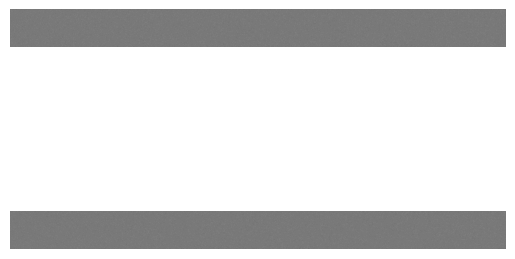

In [29]:
montage_img = np.hstack(img_list)
montage_imgR90 = np.hstack(imgR90_list)

fig, ax = plt.subplots(2)
ax[0].imshow(montage_img, cmap='gray')
ax[0].axis('off')
ax[1].imshow(montage_imgR90, cmap='gray')
ax[1].axis('off')

In [32]:
print(mean_intensity_list)
# fig, ax = plt.subplots()
# ax.scatter(range(len(img_list)), uni_x_list)
# fig, ax = plt.subplots()
# ax.scatter(range(len(img_list)), uni_y_list)
print(uni_x_list)
print(uni_y_list)

[23035.482460021973, 23042.58544921875, 23039.222778320312, 23042.125900268555, 23038.558631896973, 23041.936603546143, 23039.11667251587, 23039.894485473633, 23039.923957824707, 23039.666919708252, 23040.46438217163, 23040.13709640503, 23040.05429458618]
[21.87684567428634, 20.146536217259683, 19.397566931005425, 19.20336509571637, 19.171729048272258, 21.41813493768801, 19.379109625956666, 19.267471533034545, 19.939603106125972, 20.14585232452142, 21.78312130897699, 20.31689683536084, 19.82241472658365]
[21.87684567428634, 20.146536217259683, 19.397566931005425, 19.20336509571637, 19.171729048272258, 21.41813493768801, 19.379109625956666, 19.267471533034545, 19.939603106125972, 20.14585232452142, 21.78312130897699, 20.31689683536084, 19.82241472658365]


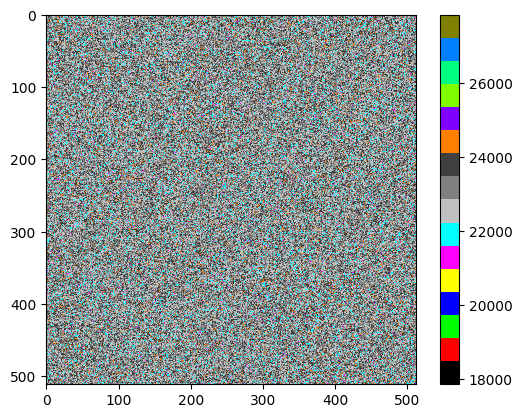

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# ImageJ "16 Colors" LUT
imagej_lut = np.array([
    [0, 0, 0],      # Black
    [255, 0, 0],    # Red
    [0, 255, 0],    # Green
    [0, 0, 255],    # Blue
    [255, 255, 0],  # Yellow
    [255, 0, 255],  # Magenta
    [0, 255, 255],  # Cyan
    [192, 192, 192],  # Light Gray
    [128, 128, 128],  # Medium Gray
    [64, 64, 64],    # Dark Gray
    [255, 128, 0],   # Orange
    [128, 0, 255],   # Purple
    [128, 255, 0],   # Light Green
    [0, 255, 128],   # Sea Green
    [0, 128, 255],   # Light Blue
    [128, 128, 0]    # Olive
])

# Convert to values between 0 and 1
imagej_lut = imagej_lut / 255.0

# Create ListedColormap
imagej_colormap = ListedColormap(imagej_lut)

# Example usage with imshow
# data = np.random.random((10, 10)) * 15  # Example data with values between 0 and 15
plt.imshow(img_list[0], cmap=imagej_colormap)
plt.colorbar()
plt.show()
